In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! kaggle datasets download -d tawsifurrahman/covid19-radiography-database

covid19-radiography-database.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip /content/covid19-radiography-database.zip

Streaming output truncated to the last 5000 lines.
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7921.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7922.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7923.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7924.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7925.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7926.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7927.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7928.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7929.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-793.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7930.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7931.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7932.png  
 

In [ ]:
for dirname, _, filenames in os.walk('/content/COVID-19_Radiography_Dataset'):
    count = 0
    for filename in filenames:
        print(os.path.join(dirname, filename))
        count += 1
        if count == 2:
            break

/content/COVID-19_Radiography_Dataset/Normal.metadata.xlsx
/content/COVID-19_Radiography_Dataset/README.md.txt
/content/COVID-19_Radiography_Dataset/Viral Pneumonia/masks/Viral Pneumonia-26.png
/content/COVID-19_Radiography_Dataset/Viral Pneumonia/masks/Viral Pneumonia-436.png
/content/COVID-19_Radiography_Dataset/Viral Pneumonia/images/Viral Pneumonia-26.png
/content/COVID-19_Radiography_Dataset/Viral Pneumonia/images/Viral Pneumonia-436.png
/content/COVID-19_Radiography_Dataset/Lung_Opacity/masks/Lung_Opacity-2928.png
/content/COVID-19_Radiography_Dataset/Lung_Opacity/masks/Lung_Opacity-1761.png
/content/COVID-19_Radiography_Dataset/Lung_Opacity/images/Lung_Opacity-2928.png
/content/COVID-19_Radiography_Dataset/Lung_Opacity/images/Lung_Opacity-1761.png
/content/COVID-19_Radiography_Dataset/COVID/masks/COVID-1997.png
/content/COVID-19_Radiography_Dataset/COVID/masks/COVID-849.png
/content/COVID-19_Radiography_Dataset/COVID/images/COVID-1997.png
/content/COVID-19_Radiography_Dataset/CO

### Data File Description

In [ ]:
path ='/content/COVID-19_Radiography_Dataset/README.md.txt'

with open(os.path.join(os.path.dirname('README.md.txt'), path), 'r') as input_file:
    content = input_file.read()
    print(content)

*****COVID-19 CHEST X-RAY DATABASE

A team of researchers from Qatar University, Doha, Qatar, and the University of Dhaka, Bangladesh along with their collaborators from Pakistan and Malaysia in collaboration with medical doctors have created a database of chest X-ray images for COVID-19 positive cases along with Normal and Viral Pneumonia images. This COVID-19, normal and other lung infection dataset is released in stages. In the first release we have released 219 COVID-19, 1341 normal and 1345 viral pneumonia chest X-ray (CXR) images. In the first update, we have increased the COVID-19 class to 1200 CXR images. In the 2nd update, we have increased the database to 3616 COVID-19 positive cases along with 10,192 Normal, 6012 Lung Opacity (Non-COVID lung infection) and 1345 Viral Pneumonia images and corresponding lung masks. We will continue to update this database as soon as we have new x-ray images for COVID-19 pneumonia patients.  


**COVID-19 data:
-----------------------
COVID dat

### Sample Image Display

In [ ]:
import cv2
image1 = cv2.imread("/content/COVID-19_Radiography_Dataset/Normal/images/Normal-10121.png")

image2 = cv2.imread("/content/COVID-19_Radiography_Dataset/Lung_Opacity/images/Lung_Opacity-35.png")

image3 = cv2.imread("/content/COVID-19_Radiography_Dataset/Viral Pneumonia/images/Viral Pneumonia-1022.png")

image4 = cv2.imread("/content/COVID-19_Radiography_Dataset/COVID/images/COVID-532.png")


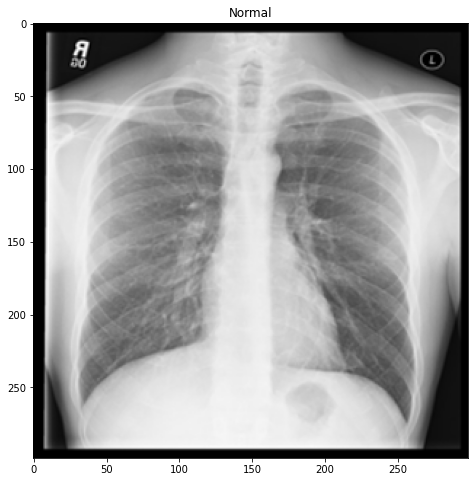

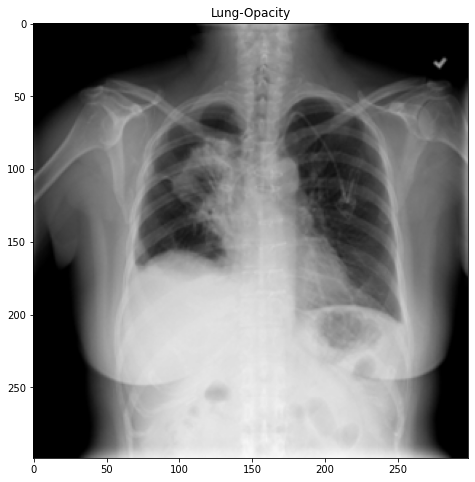

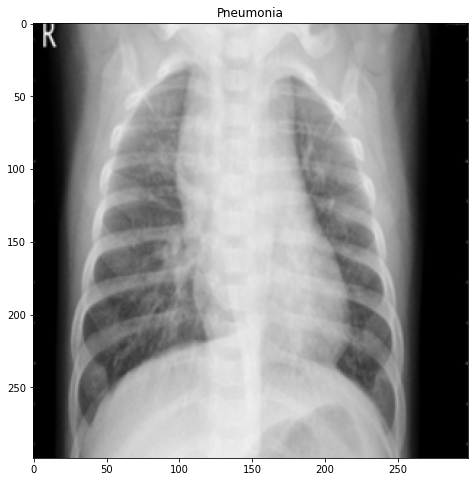

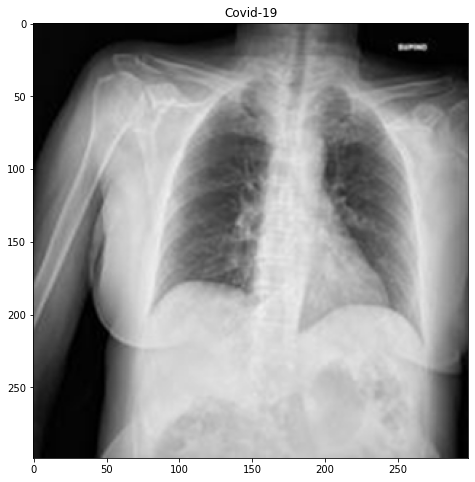

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.imshow(image1)
plt.title('Normal')
plt.show()

plt.figure(figsize=(10,8))
plt.imshow(image2)
plt.title('Lung-Opacity')
plt.show()

plt.figure(figsize=(10,8))
plt.imshow(image3)
plt.title('Pneumonia')
plt.show()

plt.figure(figsize=(10,8))
plt.imshow(image4)
plt.title('Covid-19')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print(image1.shape)
print(image2.shape)
print(image3.shape)
print(image4.shape)

(299, 299, 3)
(299, 299, 3)
(299, 299, 3)
(299, 299, 3)


In [ ]:
normal_set = []
lungOPC_set = []
covid19_set = []
pneumonia_set= []

upper_path = '/content/COVID-19_Radiography_Dataset'

count = 0
for i in os.listdir(upper_path+ '/Normal/images'):
   # print(i)
  try:
      s = cv2.imread(upper_path + '/Normal/images/' + i)
      #print("ok")
      s = cv2.cvtColor(s,cv2.COLOR_BGR2RGB)
      s = cv2.resize(s, (256,256), interpolation= cv2.INTER_AREA)
      normal_set.append(s)
      count = count + 1
      if count > 1000:
          #print(count)
          break
  except:
      #print(i)
      continue

#print(count)

count = 0
for i in os.listdir(upper_path + '/Lung_Opacity/images'):
  try:
      s = cv2.imread(upper_path + '/Lung_Opacity/images/' + i)
      #print("ok")
      s = cv2.cvtColor(s,cv2.COLOR_BGR2RGB)
      s = cv2.resize(s, (256,256), interpolation= cv2.INTER_AREA)
      count = count + 1
      lungOPC_set.append(s)
      if count > 1000:
          break
  except:
    print(i)

count = 0
for i in os.listdir(upper_path + '/COVID/images'):
  try:
      s = cv2.imread(upper_path + '/COVID/images/' + i)
      #print("ok")
      s = cv2.cvtColor(s,cv2.COLOR_BGR2RGB)
      s = cv2.resize(s, (256,256), interpolation= cv2.INTER_AREA)
      covid19_set.append(s)
      if count > 1000:
          break
  except:
      print(i)

count = 0
for i in os.listdir( '/content/COVID-19_Radiography_Dataset/Viral Pneumonia/images/'):
  try:
      s = cv2.imread('/content/COVID-19_Radiography_Dataset/Viral Pneumonia/images/' + i)
      #print("ok")
      s = cv2.cvtColor(s,cv2.COLOR_BGR2RGB)
      s = cv2.resize(s, (256,256), interpolation= cv2.INTER_AREA)
      pneumonia_set.append(s)
      if count > 1000:
          break
  except:
      print(i)

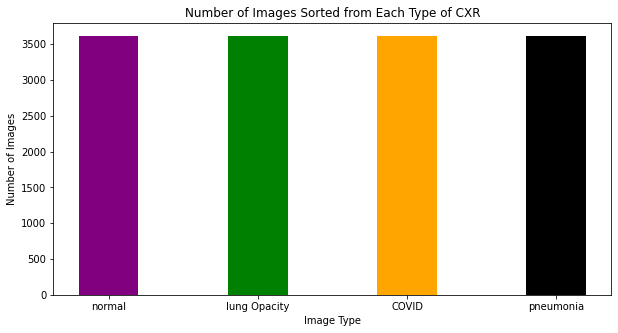

In [ ]:
import matplotlib.pyplot as plt
file_dist = {'normal':3616, 'lung Opacity':3616, 'COVID':3616,'pneumonia':3616}
courses = list(file_dist.keys())
values = list(file_dist.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color = ['purple', 'green', 'orange','black'],
        width = 0.4)
 
plt.xlabel("Image Type")
plt.ylabel("Number of Images")
plt.title("Number of Images Sorted from Each Type of CXR")
plt.show()

In [ ]:
y_normal = [0 for i in normal_set]
y_lungOPC = [1 for i in lungOPC_set]
y_covid19 = [2 for i in covid19_set]
y_pneumonia = [3 for i in pneumonia_set]

In [ ]:
from tensorflow.keras.utils import to_categorical
class_labels =to_categorical(y_normal + y_lungOPC + y_covid19+y_pneumonia)
class_labels.shape

(5163, 4)

In [ ]:
data_value = np.array(normal_set + lungOPC_set + covid19_set+pneumonia_set)
data_value.shape

(5163, 256, 256, 3)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_rem, y_train, y_rem = train_test_split(data_value, class_labels, test_size=0.1, shuffle = True)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.1)

In [ ]:
from keras.models import Sequential, Model,load_model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D, Conv3D, MaxPooling3D,GlobalAveragePooling3D
from tensorflow.keras.layers import BatchNormalization
from keras import optimizers

In [ ]:
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(4646, 256, 256, 3)
(4646, 4)
(465, 256, 256, 3)
(465, 4)
(52, 256, 256, 3)
(52, 4)


(None, None)

## Model Building

In [ ]:
from keras.layers import Dropout, Flatten, Dense
from keras import callbacks
# CNN Model
model = Sequential()

model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Conv2D(64, kernel_size=3, activation="relu",padding ="same"))
model.add(Conv2D(64, kernel_size=3, activation="relu",padding ="same"))
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Conv2D(128, kernel_size=3, activation="relu",padding ="same"))
model.add(Conv2D(128, kernel_size=3, activation="relu",padding ="same"))
model.add(Conv2D(128, kernel_size=3, activation="relu",padding ="same"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(4, activation='softmax'))


In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 127, 127, 64)      18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 127, 127, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 63, 63, 128)       7

In [ ]:
import tensorflow as tf
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10, batch_size = 13)

Epoch 1/10
358/358 [==============================] - 1631s 5s/step - loss: 4.7367 - accuracy: 0.8457 - val_loss: 0.4123 - val_accuracy: 0.8602
Epoch 2/10
358/358 [==============================] - 1676s 5s/step - loss: 0.4577 - accuracy: 0.8810 - val_loss: 0.3237 - val_accuracy: 0.9118
Epoch 3/10
358/358 [==============================] - 1702s 5s/step - loss: 0.3555 - accuracy: 0.9072 - val_loss: 0.2963 - val_accuracy: 0.9226
Epoch 4/10
358/358 [==============================] - 1652s 5s/step - loss: 0.2887 - accuracy: 0.9206 - val_loss: 0.4434 - val_accuracy: 0.8989
Epoch 5/10
358/358 [==============================] - 1646s 5s/step - loss: 0.3026 - accuracy: 0.9115 - val_loss: 0.2395 - val_accuracy: 0.9183
Epoch 6/10
358/358 [==============================] - 1650s 5s/step - loss: 0.2522 - accuracy: 0.9294 - val_loss: 0.2076 - val_accuracy: 0.9312
Epoch 7/10
358/358 [==============================] - 1658s 5s/step - loss: 0.1729 - accuracy: 0.9471 - val_loss: 0.1891 - val_accuracy:

## Results

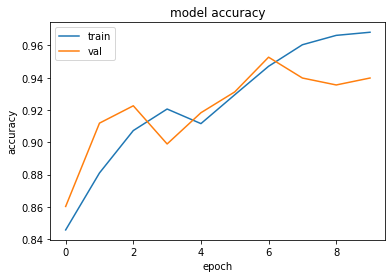

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

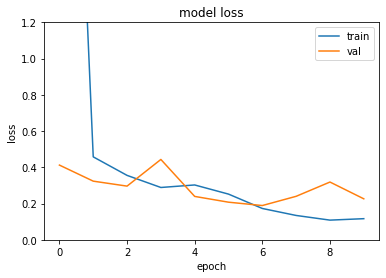

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim(0,1.2)
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [ ]:
predictions = model.predict(X_test)
classes = np.argmax(predictions,axis=1)
print(classes)

[3 3 2 3 3 2 2 2 2 2 2 3 2 3 3 3 2 2 2 2 3 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2
 3 2 3 2 2 3 3 2 3 2 2 3 2 2 2]


In [ ]:
actual_classes = np.argmax(y_test,axis=1)
print(actual_classes)

[3 3 2 3 3 2 2 2 2 2 2 3 3 3 3 3 2 2 2 3 3 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2
 3 2 3 2 2 3 3 2 3 2 2 3 2 2 2]


In [ ]:
true_count = 0
indx = 0

for i in classes:
    if i == actual_classes[indx]:
        true_count = true_count + 1
    indx = indx + 1

test_accuracy = true_count / len(actual_classes)
print('Final Testing Accuracy: ',test_accuracy)

Final Testing Accuracy:  0.9615384615384616


### Weights

In [ ]:
for layer in model.layers:
    weights = layer.get_weights()

In [ ]:
weights[0]

array([[ 0.05456802, -0.03795348, -0.05020221,  0.04933723],
       [-0.03180713,  0.07094941,  0.00352629, -0.06528184],
       [ 0.02669604, -0.03083114, -0.05780884, -0.000162  ],
       ...,
       [ 0.09236056,  0.01872335,  0.04968422, -0.07323947],
       [-0.07900312, -0.0923406 ,  0.04085045,  0.09615212],
       [-0.01403992,  0.01736063, -0.00522391, -0.05476885]],
      dtype=float32)